In [5]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/training",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 2152 files belonging to 3 classes.


In [8]:
class_names=dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [9]:
len(dataset)
#68 batches of 32 images each so 32*68=actual dataset size(2176 ~ 2152)

68

In [10]:
#take 1 batch from dataset
for image_batch,label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch)


(32, 256, 256, 3)
tf.Tensor([1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0], shape=(32,), dtype=int32)


Potato___Early_blight


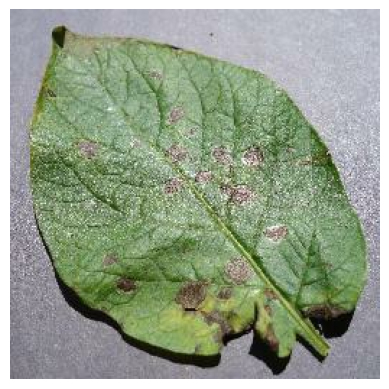

In [ ]:
#displaying the image
for image_batch,label_batch in dataset.take(1):
  for i in label_batch:
    print(class_names[label_batch[i]])
    break
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  plt.axis("off")

#as shuffel is on everytime this will print a new image after hitting the run button

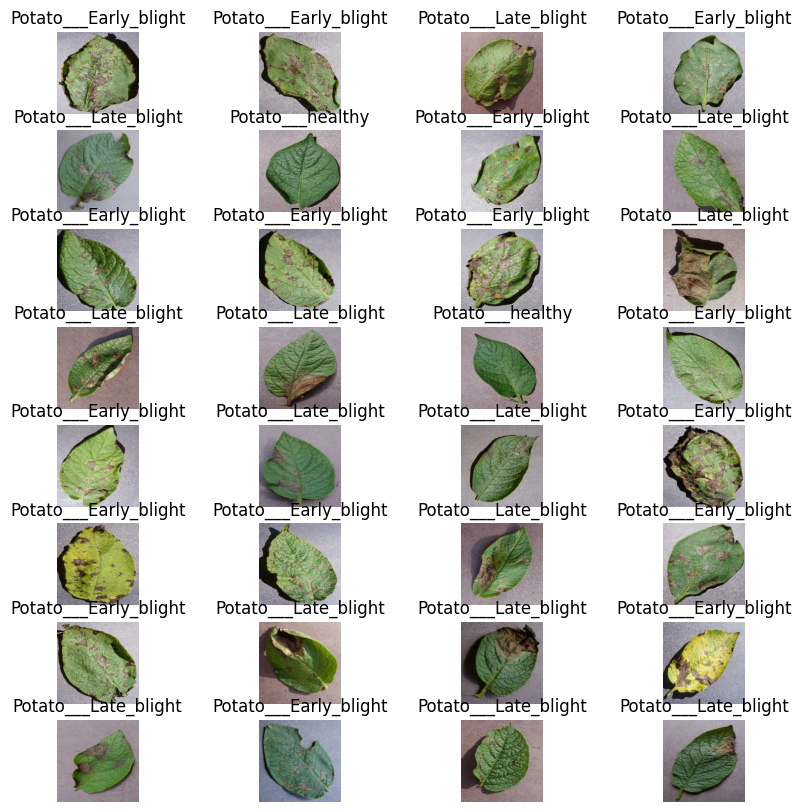

In [12]:
#displaying whole batch
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range (32):
    ax=plt.subplot(8,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")


In [ ]:
'''80% for training
  20%=> 10% validation,10% testing
  from total of 68 batches
'''


'80% for training\n  20%=> 10% validation,10% testing\n'

In [14]:
train_ds= dataset.take(54)#as 54 is 80% of 68 which is size of ds
len(train_ds)

54

In [15]:
test_ds=dataset.skip(54)
len(test_ds)


14

In [16]:
val_ds=test_ds.take(6)
test_ds=test_ds.skip(6)
print(len(val_ds))
print(len(test_ds))

6
8


In [17]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


cache() → Store dataset in memory for faster access.

shuffle(1000) → Randomize dataset to prevent order bias.

prefetch(AUTOTUNE) → Improve efficiency by preloading batches while training.

DATA PREPROCESSING

In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])


In [19]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [20]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

Model Training


In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )


In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size =BATCH_SIZE,
    verbose=1, #Displays training progress
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 379s 5s/step - accuracy: 0.5133 - loss: 0.9246 - val_accuracy: 0.5365 - val_loss: 0.7756
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 247s 5s/step - accuracy: 0.5830 - loss: 0.8001 - val_accuracy: 0.5156 - val_loss: 0.8817
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 256s 5s/step - accuracy: 0.4700 - loss: 0.9293 - val_accuracy: 0.5573 - val_loss: 0.8551
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 248s 5s/step - accuracy: 0.6666 - loss: 0.7666 - val_accuracy: 0.6875 - val_loss: 0.6849
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 257s 5s/step - accuracy: 0.8129 - loss: 0.4628 - val_accuracy: 0.7396 - val_loss: 0.6938
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - accuracy: 0.8814 - loss: 0.2814 - val_accuracy: 0.8594 - val_loss: 0.4426
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 244s 5s/step - accuracy: 0.9127 - loss: 0.2441 - val_accuracy: 0.8698 - val_loss: 0.3547
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 270s 5s/step - accuracy: 0.9430 - loss: 0.1441 - val_accuracy: 0.8646 - v

In [25]:
model.save('model.h5')  # Save model in HDF5 format


In [26]:
model.save("my_model.keras")  # ✅ Recommended Keras format


In [27]:
model.save("/content/drive/MyDrive/MyModels/my_model.keras")


In [28]:
model.save("/content/drive/MyDrive/my_model.keras")


In [ ]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/my_model.keras")

In [29]:
import os

# Check if the file exists
if os.path.exists("my_model.keras"):
    print("✅ Model is saved successfully!")
else:
    print("❌ Model saving failed.")


✅ Model is saved successfully!


In [30]:
train_acc = model.history.history['accuracy']
print(train_acc)

[0.5109953880310059, 0.5260416865348816, 0.49189814925193787, 0.7199074029922485, 0.8408564925193787, 0.8888888955116272, 0.9155092835426331, 0.9479166865348816, 0.9594907164573669, 0.9623842835426331, 0.9670138955116272, 0.9635416865348816, 0.9722222089767456, 0.9722222089767456, 0.9739583134651184, 0.9774305820465088, 0.9768518805503845, 0.984375, 0.9681712985038757, 0.9762731194496155, 0.9774305820465088, 0.984375, 0.9837962985038757, 0.9774305820465088, 0.9780092835426331, 0.9849537014961243, 0.9878472089767456, 0.9878472089767456, 0.9849537014961243, 0.9832175970077515, 0.9728009104728699, 0.9861111044883728, 0.9837962985038757, 0.9884259104728699, 0.9901620149612427, 0.9936342835426331, 0.9890046119689941, 0.984375, 0.9924768805503845, 0.9942129850387573, 0.9942129850387573, 0.9878472089767456, 0.9907407164573669, 0.9866898059844971, 0.9936342835426331, 0.9942129850387573, 0.9953703880310059, 0.9913194179534912, 0.9936342835426331, 0.9861111044883728]


In [1]:
model.evaluate(test_ds)

NameError: name 'model' is not defined

In [32]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/my_model.keras")  # Use correct path


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [34]:
print(os.listdir("/content/"))  # See if the model is still in Colab


['.config', 'my_model.keras', 'drive', 'model.h5', 'sample_data']


In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
#print(acc, val_acc, loss, val_loss)

[0.5109953880310059, 0.5260416865348816, 0.49189814925193787, 0.7199074029922485, 0.8408564925193787, 0.8888888955116272, 0.9155092835426331, 0.9479166865348816, 0.9594907164573669, 0.9623842835426331, 0.9670138955116272, 0.9635416865348816, 0.9722222089767456, 0.9722222089767456, 0.9739583134651184, 0.9774305820465088, 0.9768518805503845, 0.984375, 0.9681712985038757, 0.9762731194496155, 0.9774305820465088, 0.984375, 0.9837962985038757, 0.9774305820465088, 0.9780092835426331, 0.9849537014961243, 0.9878472089767456, 0.9878472089767456, 0.9849537014961243, 0.9832175970077515, 0.9728009104728699, 0.9861111044883728, 0.9837962985038757, 0.9884259104728699, 0.9901620149612427, 0.9936342835426331, 0.9890046119689941, 0.984375, 0.9924768805503845, 0.9942129850387573, 0.9942129850387573, 0.9878472089767456, 0.9907407164573669, 0.9866898059844971, 0.9936342835426331, 0.9942129850387573, 0.9953703880310059, 0.9913194179534912, 0.9936342835426331, 0.9861111044883728] [0.5364583134651184, 0.51562

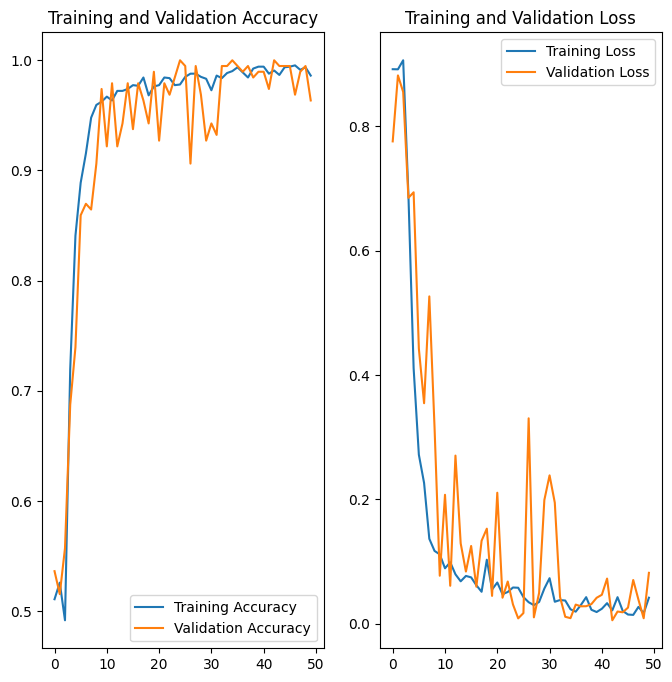

In [38]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Potato___Late_blight


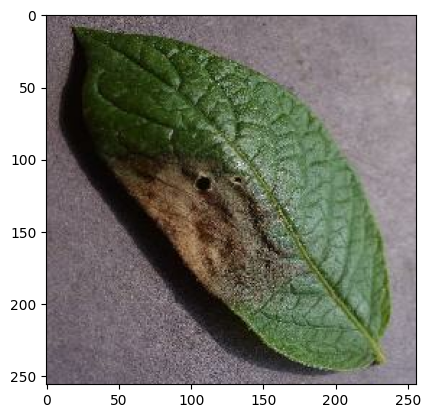

In [40]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

Write a function for inference

In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


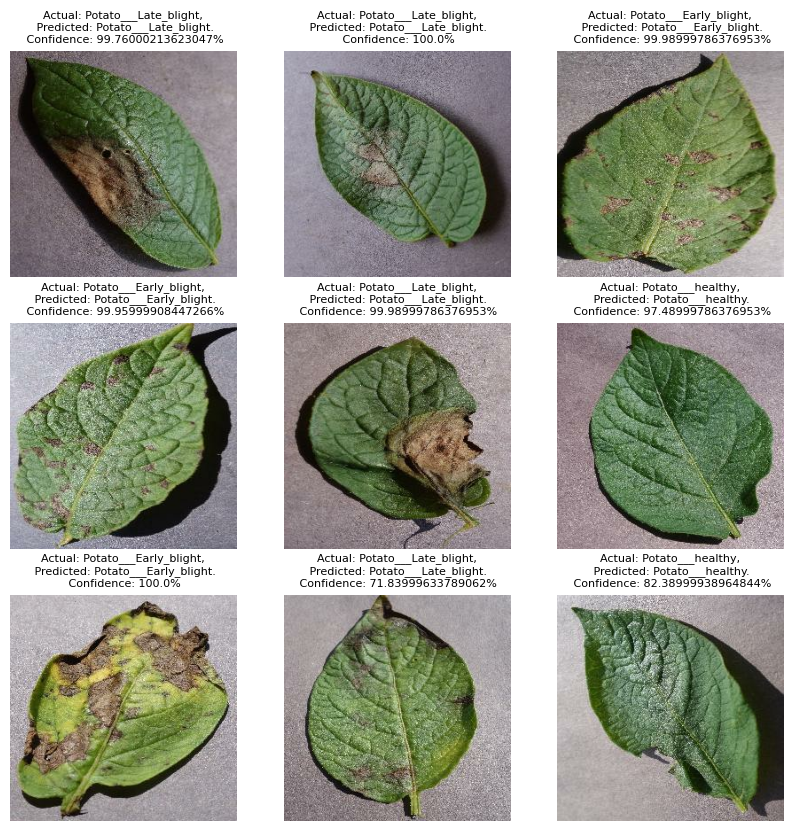

In [45]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%", fontsize=8)


        plt.axis("off")

In [46]:
model.save(r"C:\Users\ruchi\Documents\Potato-disease\model\my_model.keras")
